In [40]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [41]:
data = pd.read_excel('data.xlsx')
data.columns = ['class', 'messages']
#ham = 0 and spam = 1

In [42]:
data.head(20)

,class,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [43]:
data.describe()

,class,messages
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


In [44]:
data["length"] = data["messages"].apply(len)
data.sort_values(by='length', ascending=False).head(20)

,class,messages,length
1085,ham,For me the love should start with attraction.i...,910
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2434,ham,Indians r poor but India is not a poor country...,629
1579,ham,How to Make a girl Happy? It's not at all diff...,611
2849,ham,Sad story of a Man - Last week was my b'day. M...,588
2158,ham,Sad story of a Man - Last week was my b'day. M...,588
2380,ham,"Good evening Sir, hope you are having a nice d...",482
3017,ham,"&lt;#&gt; is fast approaching. So, Wish u a v...",461
1513,ham,"Hey sweet, I was wondering when you had a mome...",458
2370,ham,A Boy loved a gal. He propsd bt she didnt mind...,446


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

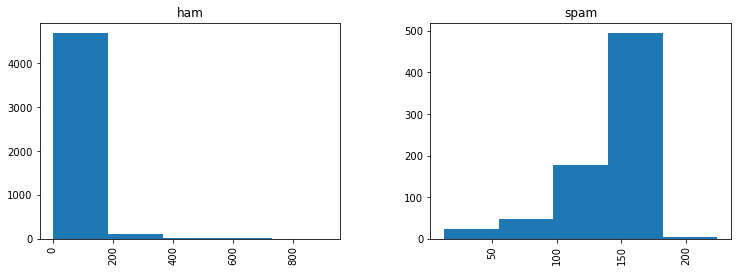

In [45]:
data.hist(column = 'length', by ='class',figsize=(12,4), bins = 5)

In [46]:
def transform_message(message):
    message_not_punc = []
    i = 0
    for punctuation in message:
        if punctuation not in string.punctuation:
            message_not_punc.append(punctuation)
    message_not_punc = ''.join(message_not_punc) 
    message_clean = list(message_not_punc.split(" "))
    while i <= len(message_clean):
        for mess in message_clean:
            if mess.lower()  in stopwords.words('english'):
                message_clean.remove(mess)
        i =i +1
    return  message_clean

In [152]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import re

In [153]:
corpus=[]

In [173]:
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['messages'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [155]:
cv = CountVectorizer(max_features=36)
X = cv.fit_transform(corpus).toarray()

In [156]:
y=pd.get_dummies(data['class'])
y=y.iloc[:,1].values

In [157]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

### Naiver Bayes Classifier

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [159]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

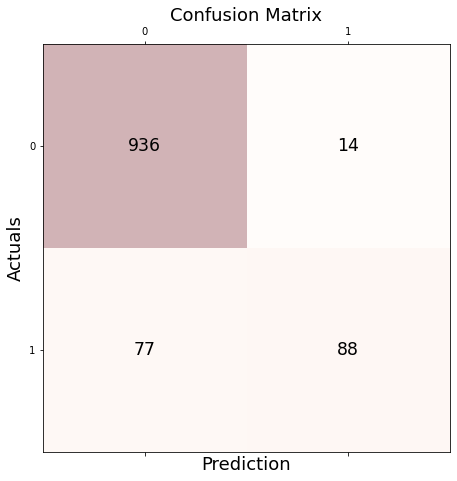

In [160]:
# confusion matrix
import matplotlib.pyplot as plt
conf_matrix=confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax =plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j],va='center', ha='center', size='xx-large')
        
plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [161]:
accuracy = spam_detect_model.score(X_test,y_test)
accuracy = accuracy*100
print("Model Accuracy : %.2f" % accuracy,"%")

Model Accuracy : 91.84 %


In [162]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       950
           1       0.86      0.53      0.66       165

    accuracy                           0.92      1115
   macro avg       0.89      0.76      0.81      1115
weighted avg       0.91      0.92      0.91      1115



### SVM classfier

In [163]:
clf = SVC(kernel='linear').fit(X_train, y_train)

In [164]:
predictions = clf.predict(X_test)
print('predicted', predictions)

predicted [0 0 0 ... 0 0 0]


In [165]:
accuracy = clf.score(X_test,y_test)
accuracy = accuracy*100
print("Model Accuracy : %.2f" % accuracy,"%")

Model Accuracy : 93.45 %


In [174]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       950
           1       0.83      0.70      0.76       165

    accuracy                           0.93      1115
   macro avg       0.89      0.84      0.86      1115
weighted avg       0.93      0.93      0.93      1115



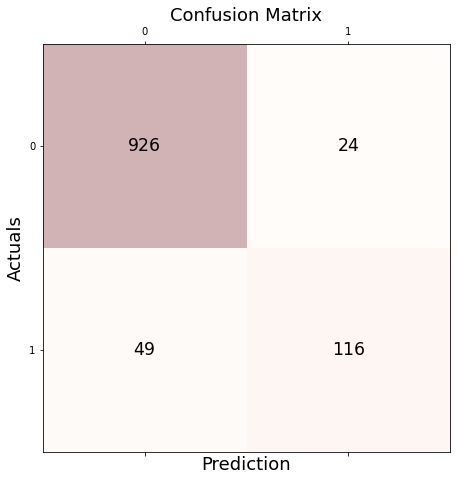

In [166]:
# confusion matrix
import matplotlib.pyplot as plt
conf_matrix=confusion_matrix(y_true=y_test, y_pred=predictions)
fig, ax =plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j],va='center', ha='center', size='xx-large')
        
plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [167]:
def process(msg):
    review = re.sub('[^a-zA-Z]', ' ', msg[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    return msg

In [168]:
def output_lable(n):
    if n == 0:
        return "Not a spam"
    elif n == 1:
        return "Spam message"
    
def manual_testing(msg):
    testing_msg = {"text":[msg]}
    new_def_test = pd.DataFrame(testing_msg)
    new_def_test["text"] = new_def_test["text"].apply(process) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.fit_transform(new_x_test).toarray()
    pred_svm = clf.predict(new_xv_test)
    print("\n\n\n\n")
    print(new_xv_test)
    return print("\n\nLR Prediction: {}".format(output_lable(pred_svm[0])))

In [170]:
msg = str(input())
manual_testing(msg)

Wow. I never realized that you were so embarassed by your accomodations. I thought you liked it, since i was doing the best i could and you always seemed so happy about "the cave". I'm sorry I didn't and don't have more to give. I'm sorry i offered. I'm sorry your room was so embarassing.





[[0.11785113 0.11785113 0.11785113 0.23570226 0.11785113 0.11785113
  0.11785113 0.11785113 0.11785113 0.11785113 0.11785113 0.11785113
  0.11785113 0.11785113 0.11785113 0.11785113 0.11785113 0.11785113
  0.11785113 0.11785113 0.11785113 0.11785113 0.11785113 0.11785113
  0.11785113 0.35355339 0.35355339 0.11785113 0.23570226 0.11785113
  0.11785113 0.23570226 0.11785113 0.11785113 0.35355339 0.23570226]]


LR Prediction: Not a spam


In [ ]:
#Wow. I never realized that you were so embarassed by your accomodations. I thought you liked it, since i was doing the best i could and you always seemed so happy about "the cave". I'm sorry I didn't and don't have more to give. I'm sorry i offered. I'm sorry your room was so embarassing.
#Ham